In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
!pip install spotipy
import spotipy
from tqdm import tqdm
from time import sleep
!pip install --default-timeout=100 future


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [157]:
def open_cache(filename):
    ''' opens the cache file if it exists and loads the JSON into
    a dictionary, which it then returns.
    if the cache file doesn't exist, creates a new cache dictionary
    Parameters
    ----------
    None
    Returns
    -------
    The opened cache
    '''

    try:
        cache_file = open(filename, 'r')
        cache_contents = cache_file.read()
        cacheDict = json.loads(cache_contents)
        cache_file.close()
    except:
        cacheDict = {}
    return cacheDict
        
def save_cache(cache_dict, filename):
    ''' saves the current state of the cache to disk
    Parameters
    ----------
    cache_dict: dict
        The dictionary to save
    Returns
    -------
    None
    '''
    dumped_json_cache = json.dumps(cache_dict)
    cache_file = open(filename,"w")
    cache_file.write(dumped_json_cache)
    cache_file.close() 

In [158]:
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
spotify = pd.read_csv("data/Spotify_final_dataset.csv")

In [162]:
data = pd.read_json('songlist.json')


In [163]:
with open('songlist.json','r') as f:
    data = json.loads(f.read())
# Flatten data


In [164]:
playlist_features_list = ["danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]

playlist_df = pd.DataFrame(columns = playlist_features_list)
playlist_df

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature]
Index: []

In [165]:
for (k, v) in data.items():
    playlist_df = playlist_df.append(v)

/var/folders/0q/0hjj5h_522b6bz5jc_tzgj400000gn/T/ipykernel_24387/2484615342.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playlist_df = playlist_df.append(v)
/var/folders/0q/0hjj5h_522b6bz5jc_tzgj400000gn/T/ipykernel_24387/2484615342.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playlist_df = playlist_df.append(v)
/var/folders/0q/0hjj5h_522b6bz5jc_tzgj400000gn/T/ipykernel_24387/2484615342.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playlist_df = playlist_df.append(v)
/var/folders/0q/0hjj5h_522b6bz5jc_tzgj400000gn/T/ipykernel_24387/2484615342.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  playlist_df = playlist_d

In [166]:
playlist_df.reset_index(inplace=True)
playlist_df

index  danceability  energy key  loudness mode  speechiness  \
0         0         0.755   0.522   2    -4.368    1       0.0575   
1         0         0.511   0.566   6    -7.230    0       0.2000   
2         0         0.732   0.750  11    -6.366    0       0.2310   
3         0         0.690   0.521  10    -8.492    0       0.3390   
4         0         0.585   0.520   5    -6.136    0       0.0712   
...     ...           ...     ...  ..       ...  ...          ...   
4881      0         0.640   0.519   1    -6.757    0       0.1880   
4882      0         0.235   0.660   7    -6.134    1       0.0491   
4883      0         0.814   0.743   9    -2.968    1       0.1590   
4884      0         0.359   0.497   0    -6.244    1       0.0288   
4885      0         0.874   0.552   1    -7.951    1       0.2710   

     instrumentalness  liveness  valence    tempo duration_ms time_signature  \
0                   0    0.0685    0.925   89.960      157560              4   
1                   0    0.3400    0.218   83.903      239836              4   
2                   0    0.1090    0.401  155.096      182707              4   
3                   0    0.0534    0.494  100.028      292799              4   
4             0.00007    0.1310    0.129  159.801      218147              4   
...               ...       ...      ...      ...         ...            ...   
4881                0    0.0883    0.252  103.359      143493              4   
4882                0    0.1590    0.144   64.210      216960              4   
4883                0    0.1630    0.367  107.996      214587              4   
4884                0    0.1050    0.169   99.186      206067              3   
4885            0.286    0.1440    0.521  147.043      238027              4   

      acousticness            type                      id  \
0         0.533000  audio_features  0RiRZpuVRbi7oqRdSMwhQY   
1         0.349000  audio_features  285pBltuF7vW8TeWk8hdRR   
2         0.002640  audio_features  7GX5flRQZVHRAGd6B4TmDO   
3         0.324000  audio_features  68Dni7IE4VyPkTOH9mRWHr   
4         0.124000  audio_features  0e7ipj03S05BNilyu5bRzt   
...            ...             ...                     ...   
4881      0.250000  audio_features  4Qxn47gWPSucovKrMyRf1z   
4882      0.012200  audio_features  7p9zIciejn8GXnsRdG9EQR   
4883      0.152000  audio_features  0nhVrTiCGiGRCoZOJiWzm1   
4884      0.637000  audio_features  0viGbbEJ9xV6qNJsTaXruz   
4885      0.000786  audio_features  0zNHMc1cGKe4MO5rtGtKRh   

                                       uri  \
0     spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1     spotify:track:285pBltuF7vW8TeWk8hdRR   
2     spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3     spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4     spotify:track:0e7ipj03S05BNilyu5bRzt   
...                                    ...   
4881  spotify:track:4Qxn47gWPSucovKrMyRf1z   
4882  spotify:track:7p9zIciejn8GXnsRdG9EQR   
4883  spotify:track:0nhVrTiCGiGRCoZOJiWzm1   
4884  spotify:track:0viGbbEJ9xV6qNJsTaXruz   
4885  spotify:track:0zNHMc1cGKe4MO5rtGtKRh   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1     https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2     https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3     https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4     https://api.spotify.com/v1/tracks/0e7ipj03S05B...   
...                                                 ...   
4881  https://api.spotify.com/v1/tracks/4Qxn47gWPSuc...   
4882  https://api.spotify.com/v1/tracks/7p9zIciejn8G...   
4883  https://api.spotify.com/v1/tracks/0nhVrTiCGiGR...   
4884  https://api.spotify.com/v1/tracks/0viGbbEJ9xV6...   
4885  https://api.spotify.com/v1/tracks/0zNHMc1cGKe4...   

                                           analysis_url    0  
0     https://api.spotify.com/v1/audio-analysis/0RiR...  NaN  
1     https://api.spotify.com/v1/audio-analysis/285p...  NaN  
2     https://api.sp

In [167]:
playlist_df.reset_index(inplace=True)
playlist_df

level_0  index  danceability  energy key  loudness mode  speechiness  \
0           0      0         0.755   0.522   2    -4.368    1       0.0575   
1           1      0         0.511   0.566   6    -7.230    0       0.2000   
2           2      0         0.732   0.750  11    -6.366    0       0.2310   
3           3      0         0.690   0.521  10    -8.492    0       0.3390   
4           4      0         0.585   0.520   5    -6.136    0       0.0712   
...       ...    ...           ...     ...  ..       ...  ...          ...   
4881     4881      0         0.640   0.519   1    -6.757    0       0.1880   
4882     4882      0         0.235   0.660   7    -6.134    1       0.0491   
4883     4883      0         0.814   0.743   9    -2.968    1       0.1590   
4884     4884      0         0.359   0.497   0    -6.244    1       0.0288   
4885     4885      0         0.874   0.552   1    -7.951    1       0.2710   

     instrumentalness  liveness  ...    tempo  duration_ms time_signature  \
0                   0    0.0685  ...   89.960       157560              4   
1                   0    0.3400  ...   83.903       239836              4   
2                   0    0.1090  ...  155.096       182707              4   
3                   0    0.0534  ...  100.028       292799              4   
4             0.00007    0.1310  ...  159.801       218147              4   
...               ...       ...  ...      ...          ...            ...   
4881                0    0.0883  ...  103.359       143493              4   
4882                0    0.1590  ...   64.210       216960              4   
4883                0    0.1630  ...  107.996       214587              4   
4884                0    0.1050  ...   99.186       206067              3   
4885            0.286    0.1440  ...  147.043       238027              4   

     acousticness            type                      id  \
0        0.533000  audio_features  0RiRZpuVRbi7oqRdSMwhQY   
1        0.349000  audio_features  285pBltuF7vW8TeWk8hdRR   
2        0.002640  audio_features  7GX5flRQZVHRAGd6B4TmDO   
3        0.324000  audio_features  68Dni7IE4VyPkTOH9mRWHr   
4        0.124000  audio_features  0e7ipj03S05BNilyu5bRzt   
...           ...             ...                     ...   
4881     0.250000  audio_features  4Qxn47gWPSucovKrMyRf1z   
4882     0.012200  audio_features  7p9zIciejn8GXnsRdG9EQR   
4883     0.152000  audio_features  0nhVrTiCGiGRCoZOJiWzm1   
4884     0.637000  audio_features  0viGbbEJ9xV6qNJsTaXruz   
4885     0.000786  audio_features  0zNHMc1cGKe4MO5rtGtKRh   

                                       uri  \
0     spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1     spotify:track:285pBltuF7vW8TeWk8hdRR   
2     spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3     spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4     spotify:track:0e7ipj03S05BNilyu5bRzt   
...                                    ...   
4881  spotify:track:4Qxn47gWPSucovKrMyRf1z   
4882  spotify:track:7p9zIciejn8GXnsRdG9EQR   
4883  spotify:track:0nhVrTiCGiGRCoZOJiWzm1   
4884  spotify:track:0viGbbEJ9xV6qNJsTaXruz   
4885  spotify:track:0zNHMc1cGKe4MO5rtGtKRh   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1     https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2     https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3     https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4     https://api.spotify.com/v1/tracks/0e7ipj03S05B...   
...                                                 ...   
4881  https://api.spotify.com/v1/tracks/4Qxn47gWPSuc...   
4882  https://api.spotify.com/v1/tracks/7p9zIciejn8G...   
4883  https://api.spotify.com/v1/tracks/0nhVrTiCGiGR...   
4884  https://api.spotify.com/v1/tracks/0viGbbEJ9xV6...   
4885  https://api.spotify.com/v1/tracks/0zNHMc1cGKe4...   

                                           analysis_url    0  
0     https://api.spotify.com/v1/audio-analysis/0RiR...  NaN  
1     https://api.spoti

In [168]:
spotify = spotify[:4886]
spotify.reset_index(inplace=True)



In [169]:
spotify = spotify.rename(columns={"index": "level_0"})

In [170]:
playlist_df

level_0  index  danceability  energy key  loudness mode  speechiness  \
0           0      0         0.755   0.522   2    -4.368    1       0.0575   
1           1      0         0.511   0.566   6    -7.230    0       0.2000   
2           2      0         0.732   0.750  11    -6.366    0       0.2310   
3           3      0         0.690   0.521  10    -8.492    0       0.3390   
4           4      0         0.585   0.520   5    -6.136    0       0.0712   
...       ...    ...           ...     ...  ..       ...  ...          ...   
4881     4881      0         0.640   0.519   1    -6.757    0       0.1880   
4882     4882      0         0.235   0.660   7    -6.134    1       0.0491   
4883     4883      0         0.814   0.743   9    -2.968    1       0.1590   
4884     4884      0         0.359   0.497   0    -6.244    1       0.0288   
4885     4885      0         0.874   0.552   1    -7.951    1       0.2710   

     instrumentalness  liveness  ...    tempo  duration_ms time_signature  \
0                   0    0.0685  ...   89.960       157560              4   
1                   0    0.3400  ...   83.903       239836              4   
2                   0    0.1090  ...  155.096       182707              4   
3                   0    0.0534  ...  100.028       292799              4   
4             0.00007    0.1310  ...  159.801       218147              4   
...               ...       ...  ...      ...          ...            ...   
4881                0    0.0883  ...  103.359       143493              4   
4882                0    0.1590  ...   64.210       216960              4   
4883                0    0.1630  ...  107.996       214587              4   
4884                0    0.1050  ...   99.186       206067              3   
4885            0.286    0.1440  ...  147.043       238027              4   

     acousticness            type                      id  \
0        0.533000  audio_features  0RiRZpuVRbi7oqRdSMwhQY   
1        0.349000  audio_features  285pBltuF7vW8TeWk8hdRR   
2        0.002640  audio_features  7GX5flRQZVHRAGd6B4TmDO   
3        0.324000  audio_features  68Dni7IE4VyPkTOH9mRWHr   
4        0.124000  audio_features  0e7ipj03S05BNilyu5bRzt   
...           ...             ...                     ...   
4881     0.250000  audio_features  4Qxn47gWPSucovKrMyRf1z   
4882     0.012200  audio_features  7p9zIciejn8GXnsRdG9EQR   
4883     0.152000  audio_features  0nhVrTiCGiGRCoZOJiWzm1   
4884     0.637000  audio_features  0viGbbEJ9xV6qNJsTaXruz   
4885     0.000786  audio_features  0zNHMc1cGKe4MO5rtGtKRh   

                                       uri  \
0     spotify:track:0RiRZpuVRbi7oqRdSMwhQY   
1     spotify:track:285pBltuF7vW8TeWk8hdRR   
2     spotify:track:7GX5flRQZVHRAGd6B4TmDO   
3     spotify:track:68Dni7IE4VyPkTOH9mRWHr   
4     spotify:track:0e7ipj03S05BNilyu5bRzt   
...                                    ...   
4881  spotify:track:4Qxn47gWPSucovKrMyRf1z   
4882  spotify:track:7p9zIciejn8GXnsRdG9EQR   
4883  spotify:track:0nhVrTiCGiGRCoZOJiWzm1   
4884  spotify:track:0viGbbEJ9xV6qNJsTaXruz   
4885  spotify:track:0zNHMc1cGKe4MO5rtGtKRh   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/0RiRZpuVRbi7...   
1     https://api.spotify.com/v1/tracks/285pBltuF7vW...   
2     https://api.spotify.com/v1/tracks/7GX5flRQZVHR...   
3     https://api.spotify.com/v1/tracks/68Dni7IE4VyP...   
4     https://api.spotify.com/v1/tracks/0e7ipj03S05B...   
...                                                 ...   
4881  https://api.spotify.com/v1/tracks/4Qxn47gWPSuc...   
4882  https://api.spotify.com/v1/tracks/7p9zIciejn8G...   
4883  https://api.spotify.com/v1/tracks/0nhVrTiCGiGR...   
4884  https://api.spotify.com/v1/tracks/0viGbbEJ9xV6...   
4885  https://api.spotify.com/v1/tracks/0zNHMc1cGKe4...   

                                           analysis_url    0  
0     https://api.spotify.com/v1/audio-analysis/0RiR...  NaN  
1     https://api.spoti

In [171]:
df_concat = pd.merge(spotify, playlist_df, on='level_0', how='outer')


In [172]:
df_concat.head(50)

level_0  Position         Artist Name  \
0         0         1        Post Malone    
1         1         2         Juice WRLD    
2         2         3       Lil Uzi Vert    
3         3         4            J. Cole    
4         4         5        Post Malone    
5         5         6       Travis Scott    
6         6         7         The Weeknd    
7         7         8       XXXTENTACION    
8         8         9       XXXTENTACION    
9         9        10         Juice WRLD    
10       10        11     Kendrick Lamar    
11       11        12        Post Malone    
12       12        13       Travis Scott    
13       13        14           Lil Baby    
14       14        15        Post Malone    
15       15        16        Post Malone    
16       16        17      Glass Animals    
17       17        18              Drake    
18       18        19        Roddy Ricch    
19       19        20            J. Cole    
20       20        21       XXXTENTACION    
21       21        22        Post Malone    
22       22        23              Drake    
23       23        24     Olivia Rodrigo    
24       24        25         Juice WRLD    
25       25        26      Billie Eilish    
26       26        27               Joji    
27       27        28       XXXTENTACION    
28       28        29             Offset    
29       29        30      The Kid LAROI    
30       30        31      Lewis Capaldi    
31       31        32       Harry Styles    
32       32        33        Post Malone    
33       33        34             Khalid    
34       34        35  The Neighbourhood    
35       35        36           Lil Baby    
36       36        37   The Chainsmokers    
37       37        38        Post Malone    
38       38        39         The Weeknd    
39       39        40           Dua Lipa    
40       40        41      Billie Eilish    
41       41        42      Morgan Wallen    
42       42        43     Olivia Rodrigo    
43       43        44           Doja Cat    
44       44        45             DaBaby    
45       45        46          Lil Nas X    
46       46        47         The Weeknd    
47       47        48   Childish Gambino    
48       48        49          Lil Mosey    
49       49        50          Meek Mill    

                                     Song Name  Days  Top 10 (xTimes)  \
0   Sunflower  SpiderMan: Into the SpiderVerse  1506            302.0   
1                                 Lucid Dreams  1673            178.0   
2                                XO TOUR Llif3  1853            212.0   
3                               No Role Modelz  2547              6.0   
4                                     rockstar  1223            186.0   
5                                   goosebumps  1995              4.0   
6                              Blinding Lights  1100            233.0   
7                               Jocelyn Flores  1673             44.0   
8                                         SAD!  1217            133.0   
9                       All Girls Are The Same  1681              2.0   
10                                     HUMBLE.  1175            152.0   
11                                     Circles  1172            163.0   
12                                  SICKO MODE  1046            190.0   
13            Drip Too Hard (Lil Baby & Gunna)  1453            122.0   
14                             Congratulations  1215            136.0   
15                                I Fall Apart  1278            132.0   
16                                  Heat Waves   763            248.0   
17                                  God's Plan   634            139.0   
18                                     The Box   650            197.0   
19                                MIDDLE CHILD  1119            106.0   
20                                   Fuck Love  1406              9.0   
21                                  Better Now   862             72.0   
22                           

In [173]:
df_concat.describe()


level_0     Position         Days  Top 10 (xTimes)  Peak Position  \
count  4886.000000  4886.000000  4886.000000      4886.000000    4886.000000   
mean   2442.500000  2443.500000   116.830127         6.153909      39.046459   
std    1410.611038  1410.611038   175.996127        23.048870      37.344611   
min       0.000000     1.000000     3.000000         0.000000       1.000000   
25%    1221.250000  1222.250000    19.000000         0.000000      10.250000   
50%    2442.500000  2443.500000    51.000000         0.000000      26.000000   
75%    3663.750000  3664.750000   139.000000         0.750000      56.000000   
max    4885.000000  4886.000000  2547.000000       302.000000     184.000000   

       Peak Streams  Total Streams   index  danceability       energy  \
count  4.886000e+03   4.886000e+03  4886.0   4885.000000  4885.000000   
mean   8.808342e+05   4.061457e+07     0.0      0.673738     0.615587   
std    8.223653e+05   7.273367e+07     0.0      0.149564     0.168732   
min    6.226300e+04   2.429923e+06     0.0      0.143000     0.021800   
25%    3.665098e+05   5.566445e+06     0.0      0.578000     0.513000   
50%    6.198850e+05   1.394341e+07     0.0      0.688000     0.627000   
75%    1.063337e+06   4.061074e+07     0.0      0.783000     0.736000   
max    7.786096e+06   8.833697e+08     0.0      0.980000     0.982000   

          loudness  speechiness     liveness      valence        tempo  \
count  4885.000000  4885.000000  4885.000000  4885.000000  4885.000000   
mean     -6.744446     0.136262     0.181053     0.457225   121.804605   
std       2.656529     0.125912     0.134263     0.219697    29.508592   
min     -34.475000     0.023200     0.021500     0.032000    40.319000   
25%      -7.916000     0.044100     0.099600     0.284000    97.672000   
50%      -6.335000     0.079000     0.126000     0.447000   120.970000   
75%      -5.036000     0.201000     0.221000     0.619000   142.893000   
max       0.175000     0.966000     0.970000     0.979000   209.763000   

       acousticness  
count   4885.000000  
mean       0.224788  
std        0.251452  
min        0.000008  
25%        0.033000  
50%        0.121000  
75%        0.336000  
max        0.994000

In [174]:
df_concat.isnull().sum()

level_0                      0
Position                     0
Artist Name                  0
Song Name                    0
Days                         0
Top 10 (xTimes)              0
Peak Position                0
Peak Position (xTimes)       0
Peak Streams                 0
Total Streams                0
index                        0
danceability                 1
energy                       1
key                          1
loudness                     1
mode                         1
speechiness                  1
instrumentalness             1
liveness                     1
valence                      1
tempo                        1
duration_ms                  1
time_signature               1
acousticness                 1
type                         1
id                           1
uri                          1
track_href                   1
analysis_url                 1
0                         4886
dtype: int64

/var/folders/0q/0hjj5h_522b6bz5jc_tzgj400000gn/T/ipykernel_24387/3396070322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_concat.corr()


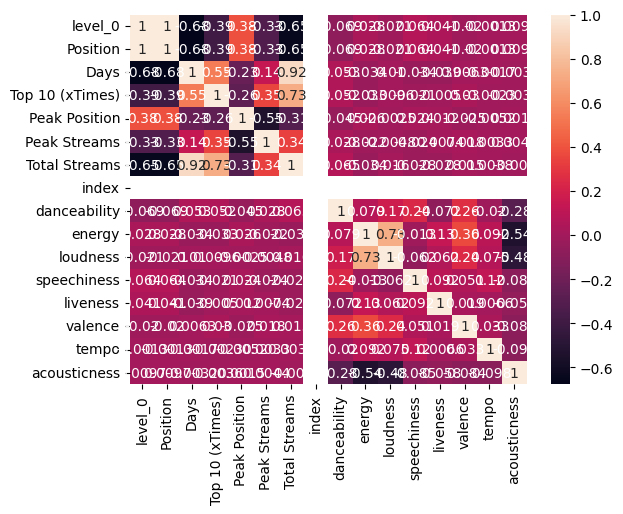

In [175]:
corr = df_concat.corr()
sns.heatmap(corr,annot=True)
plt.show()

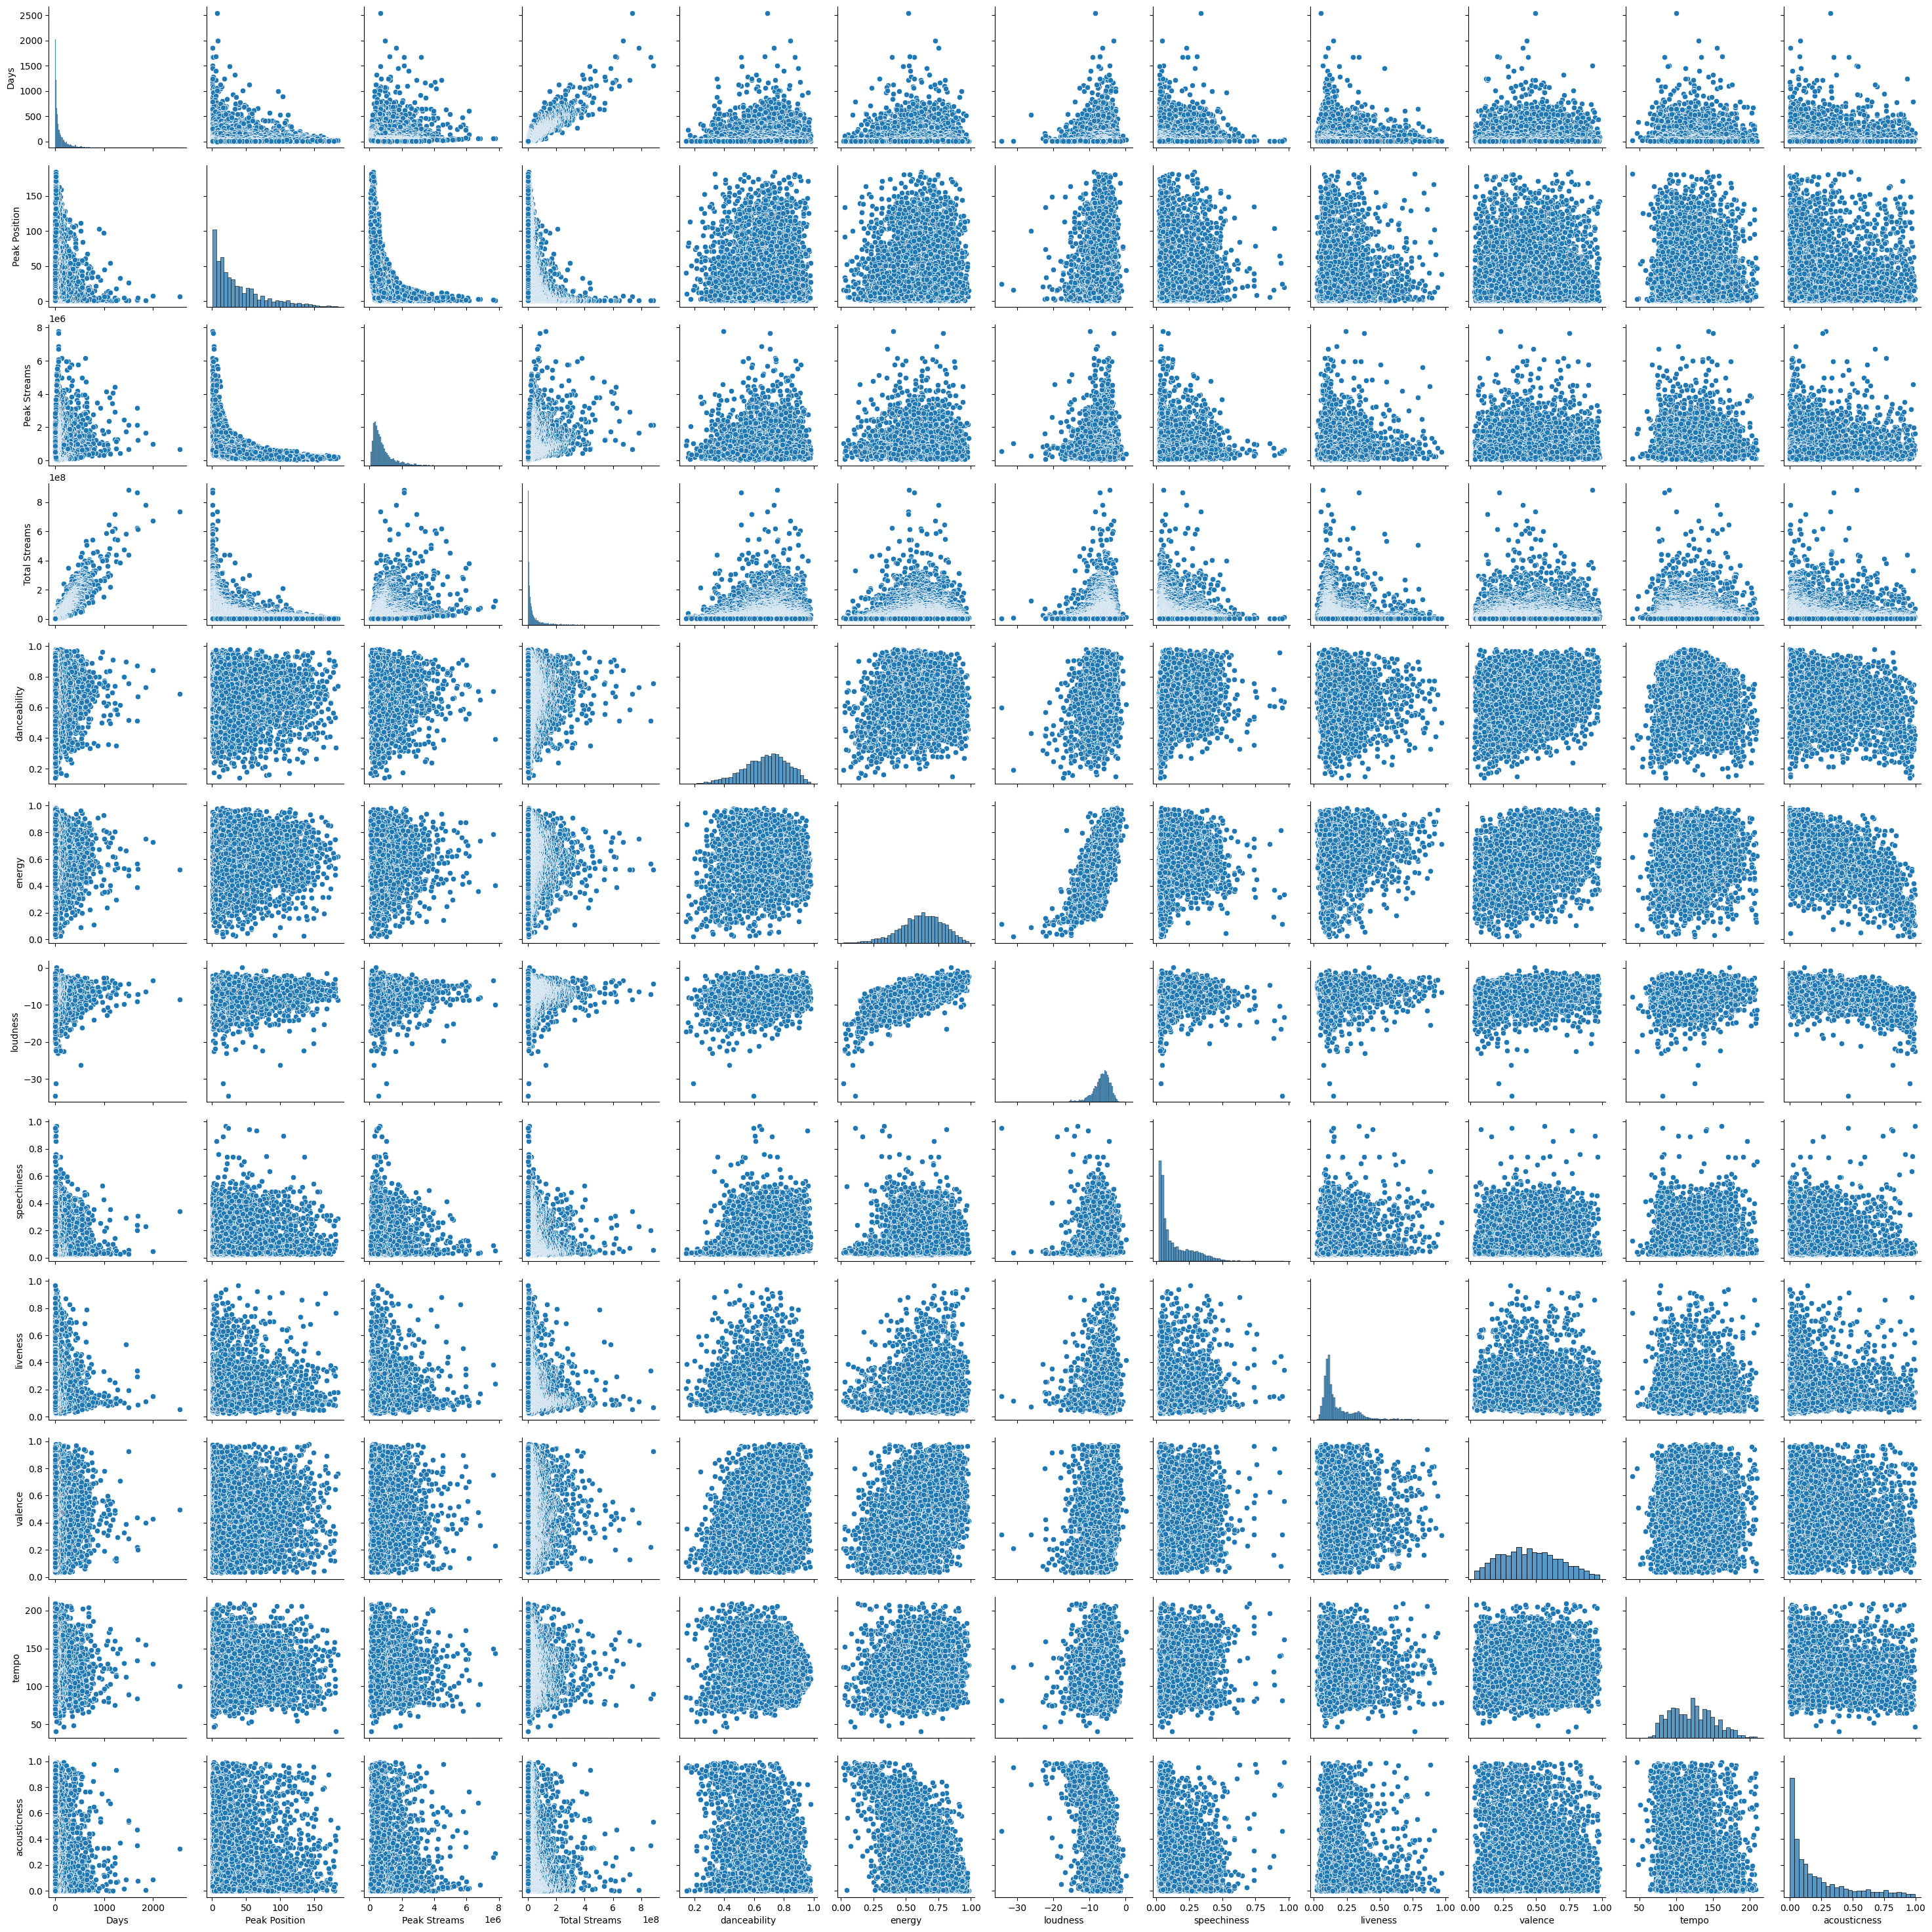

In [176]:
sns.pairplot(data=df_concat,
             vars=['Days', 'Peak Position', 'Peak Streams', 'Total Streams','danceability','energy','loudness','speechiness','liveness',
                   'valence','tempo','acousticness'])
plt.show()

In [177]:
np.random.seed(42)

In [178]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_concat, test_size=0.2, random_state=42)

In [179]:
music = train_set.drop(columns=['level_0', 'Position','Days','Artist Name','Song Name', 'Total Streams','Peak Position (xTimes)','index'])
music_labels = train_set["Total Streams"].copy()



In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [181]:
music = music.select_dtypes(['number'])

In [182]:
music

Top 10 (xTimes)  Peak Position  Peak Streams  danceability  energy  \
679               5.0              6       2438681         0.393   0.858   
4602              0.0             24        702245         0.687   0.890   
1894              7.0              3       1951750         0.761   0.586   
3299              0.0             79        392266         0.707   0.314   
1261              1.0              5       1311786         0.655   0.666   
...               ...            ...           ...           ...     ...   
4426              0.0             45        773638         0.639   0.547   
466               3.0              5       1339872         0.889   0.340   
3092              0.0             25        603416         0.466   0.659   
3772              0.0             22       1434200         0.897   0.634   
860               0.0             46        521319         0.799   0.586   

      loudness  speechiness  liveness  valence    tempo  acousticness  
679     -2.868       0.0729    0.1020    0.560  176.042       0.00359  
4602    -5.990       0.0344    0.0436    0.854  113.060       0.00396  
1894    -5.368       0.3590    0.0558    0.719  149.804       0.03920  
3299   -10.115       0.7470    0.1090    0.602  104.014       0.97700  
1261    -5.309       0.0612    0.0683    0.272  102.977       0.13400  
...        ...          ...       ...      ...      ...           ...  
4426    -6.237       0.0434    0.3730    0.117  129.939       0.11500  
466     -7.773       0.0697    0.0550    0.716   94.009       0.21800  
3092    -6.077       0.1150    0.2730    0.360  186.169       0.00282  
3772    -6.264       0.1610    0.0686    0.506  112.048       0.00413  
860     -6.735       0.0377    0.1930    0.549  120.970       0.16200  

[3908 rows x 11 columns]

In [183]:
from sklearn.compose import ColumnTransformer

num_attribs = list(music)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

music_prepared = full_pipeline.fit_transform(music)


In [184]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(music_prepared, music_labels)


LinearRegression()

In [185]:
from sklearn.metrics import mean_squared_error

music_predictions = lin_reg.predict(music_prepared)
lin_mse = mean_squared_error(music_labels, music_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

48730213.23349096

In [186]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [187]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, music_predictions, music_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 649, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1104, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 900, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[29030581.59781503 27918039.66632668 32563955.68809544 ...
 27768472.73618568 34329802.1162035  25793215.98924804].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 649, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1104, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 900, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[50278889.51451661 27206540.39942457 54782704.77979655 ...
 27768472.73618568 34329802.1162035  25793215.98924804].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 649, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/base.py", line 554, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1104, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/fionafox/Downloads/si618wn23-main/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py", line 900, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[5.02788895e+07 2.72065404e+07 5.47827048e+07 ... 2.45805482e+07
 2.27261177e+07 2.08216072e+08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [188]:
music['energetic'] = np.where(music['energy'] > 0.7, 1, 0)

In [197]:
music

Top 10 (xTimes)  Peak Position  Peak Streams  danceability  energy  \
679               5.0              6       2438681         0.393   0.858   
4602              0.0             24        702245         0.687   0.890   
1894              7.0              3       1951750         0.761   0.586   
3299              0.0             79        392266         0.707   0.314   
1261              1.0              5       1311786         0.655   0.666   
...               ...            ...           ...           ...     ...   
4426              0.0             45        773638         0.639   0.547   
466               3.0              5       1339872         0.889   0.340   
3092              0.0             25        603416         0.466   0.659   
3772              0.0             22       1434200         0.897   0.634   
860               0.0             46        521319         0.799   0.586   

      loudness  speechiness  liveness  valence    tempo  acousticness  \
679     -2.868       0.0729    0.1020    0.560  176.042       0.00359   
4602    -5.990       0.0344    0.0436    0.854  113.060       0.00396   
1894    -5.368       0.3590    0.0558    0.719  149.804       0.03920   
3299   -10.115       0.7470    0.1090    0.602  104.014       0.97700   
1261    -5.309       0.0612    0.0683    0.272  102.977       0.13400   
...        ...          ...       ...      ...      ...           ...   
4426    -6.237       0.0434    0.3730    0.117  129.939       0.11500   
466     -7.773       0.0697    0.0550    0.716   94.009       0.21800   
3092    -6.077       0.1150    0.2730    0.360  186.169       0.00282   
3772    -6.264       0.1610    0.0686    0.506  112.048       0.00413   
860     -6.735       0.0377    0.1930    0.549  120.970       0.16200   

      energetic  
679           1  
4602          1  
1894          0  
3299          0  
1261          0  
...         ...  
4426          0  
466           0  
3092          0  
3772          0  
860           0  

[3908 rows x 12 columns]

In [200]:
music1 = music.sample(n=45, random_state=41)

In [202]:
music1.reset_index(inplace=True)

In [203]:
X = music1.drop('index',axis=1)
y = music1[['index']]

In [204]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering

pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
    ('cluster', AgglomerativeClustering(n_clusters=3) ),
]) 

In [205]:
y_pred = pipe.fit_predict(X)

In [206]:
pd.concat([y, pd.DataFrame(y_pred)], axis=1)

index  0
0    3487  1
1    1959  1
2    3150  1
3    1942  0
4    1442  1
5    2261  0
6    1611  1
7     711  2
8    1325  1
9    4176  0
10   1814  0
11    585  0
12   3684  1
13   2746  1
14   3141  0
15   4329  1
16   2382  1
17   2963  0
18   2687  1
19   2620  0
20   1731  1
21   2009  0
22   3904  1
23   4818  1
24    266  2
25   4107  1
26   3223  0
27    541  2
28   4164  1
29   3461  0
30   3376  1
31   4012  1
32   3753  0
33   4095  1
34   4295  0
35    736  0
36   2039  0
37   2816  0
38    970  0
39   4331  0
40    202  0
41   4284  1
42   4853  1
43    576  1
44   1267  1

In [207]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.30322713, 0.15151718])

In [208]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.45474431248287306

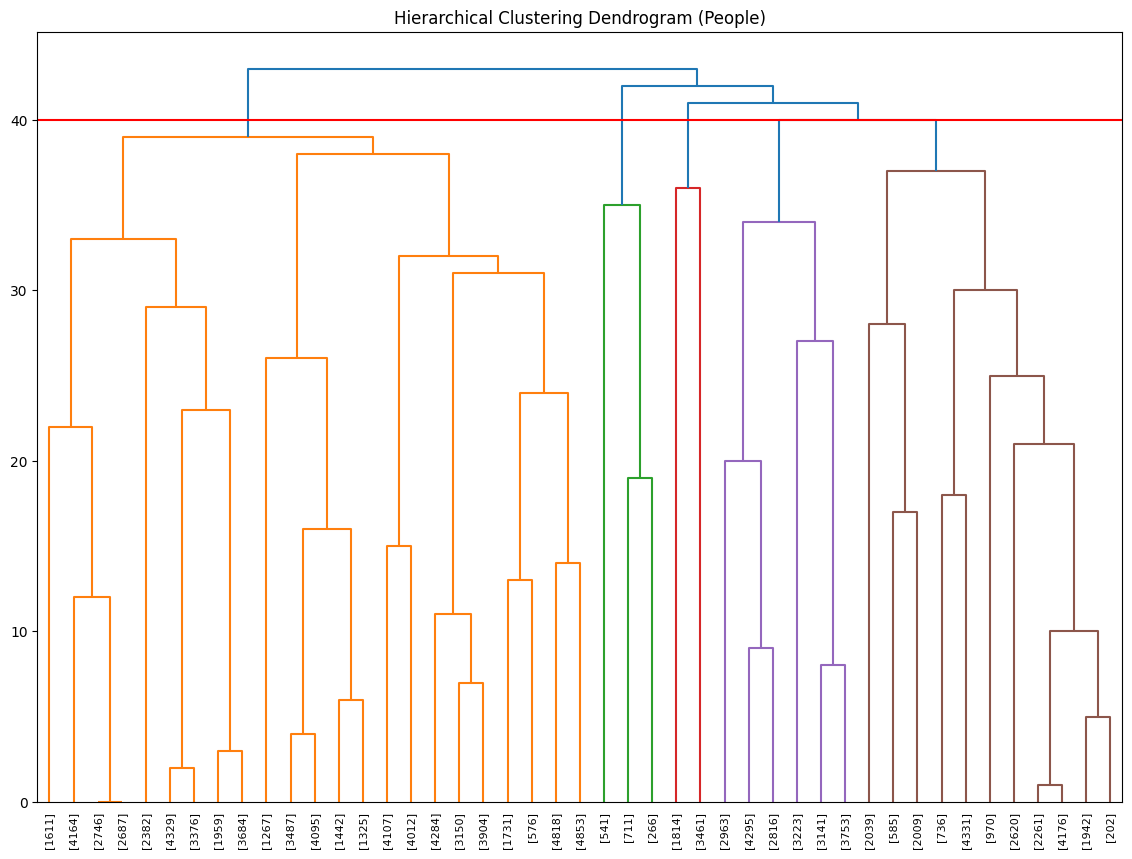

In [210]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    threshold = kwargs.pop('color_threshold',None)
    if threshold is not None:
        plt.axhline(threshold,color='red')


plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (People)')

plot_dendrogram(pipe,labels=y.values,color_threshold=40)

plt.xticks(rotation=90)
plt.show()

In [211]:
clustered = pd.concat([music1, pd.DataFrame(y_pred,columns=["cluster"])], axis=1)

In [212]:
clustered.groupby('cluster').mean().transpose()

cluster                      0              1             2
index              2491.421053    3043.000000  5.060000e+02
Top 10 (xTimes)       0.736842       0.478261  5.800000e+01
Peak Position        56.894737      37.695652  2.000000e+00
Peak Streams     714407.157895  725018.739130  2.987206e+06
danceability          0.611895       0.695435  6.380000e-01
energy                0.460532       0.773478  4.553333e-01
loudness             -8.555842      -4.963826 -8.235000e+00
speechiness           0.104068       0.099430  8.333333e-02
liveness              0.179547       0.138700  1.889000e-01
valence               0.336784       0.622261  2.280000e-01
tempo               102.573737     127.430565  1.106100e+02
acousticness          0.353305       0.099917  3.519667e-01
energetic             0.000000       0.695652  0.000000e+00